# <font color='#000000'>Master Thesis Hugo Alves | <span style="color:#BFD62F;">__Nova__</span> <span style="color:#5C666C;">__IMS__</span></font>

Welcome to the continuation of the second notebook developed for this project. We (Professor Roberto Henriques, Professor Ricardo Santos, and Hugo Alves) aim to develop a machine learning (ML) framework to predict student admissions to postgraduate and masters' programs at Nova IMS, as well as the final grade point average (GPA) of those who are accepted.

<br>
<div align="center">
  <img src="https://i.ibb.co/dMnkW88/Notebooks-Workflow.png" alt="Workflow" width="800" />
</div>
<br>

After our initial exploration of the available data, we can now shift our focus to __data preparation and preprocessing__. Here, we will deal with the transformations that are exclusive to the task of predicting the students' final GPAs. Enjoy!


# <font color="#5C666C">Contents</font> <a class="anchor" id="toc"></a>
[Initial Setup](#setup)<br>
- [ Library and Functions Import](#library)<br>
- [ Retrieving the Dataframes](#dataframes)<br>

[3. Data Preprocessing](#preprocessing)<br>
- [3.5. Scaling](#scaling)<br>
- [3.6. Feature Selection](#selection)<br>
  - [3.6.1. Spearman Correlation (between independent variables)](#spearmanredundant)<br>
  - [3.6.2. Spearman Correlation (against the dependent variable)](#spearmanrelevant)<br>
  - [3.6.3. ANOVA](#anova)<br>
  - [3.6.4. Point Biserial Correlation](#biserial)<br>
  - [3.6.5. Recursive Feature Elimination - Linear Regression](#rfelr)<br>
  - [3.6.6. Recursive Feature Elimination - Support Vector Machines](#rfesvm)<br>
  - [3.6.7. Random Forest](#rf)<br>
  - [3.6.8. Least Absolute Shrinkage and Selection Operator (LASSO)](#lasso)<br>
  - [3.6.9. Conclusion](#conclusion)<br>
- [3.7. DBSCAN for Outlier Removal](#dbscan)<br>
- [3.8. Storing the Dataframes](#storing)<br>

</div>

# <font color="#BFD62F">_____________</font>
# <font color='#5C666C'>Initial Setup</font> <a class="anchor" id="setup"></a>
[Back to Contents](#toc)

## <font color='#BFD62F'>Library and Functions Import</font> <a class="anchor" id="library"></a>
[Back to Contents](#toc)

In [1]:
#!python --version

We will be using the Python version 3.11.8.

In [2]:
#! pip install pandas==2.2.1
#! pip install numpy==1.24.4
#! pip install matplotlib==3.8.3
#! pip install seaborn==0.12.2
#! pip install plotly==5.20.0
#! pip install tenacity==8.2.2
#! pip install openpyxl>=3.1.0
#% pip install nbformat>=4.3.0
#! pip install rapidfuzz==3.11.0
#! pip install xlrd==2.0.1
#! pip install sklearn==1.2.2
#! pip install imblearn==0.11.0

In [3]:
%run Imports

In [4]:
import Functions as tf

## <font color='#BFD62F'>Retrieving the Dataframes </font> <a class="anchor" id="dataframes"></a>
[Back to Contents](#toc)

Let's retrieve the dataframes that we used in the previous notebook.

In [5]:
%store -r df_grades

%store -r X_grades_train
%store -r X_grades_val
%store -r y_grades_train
%store -r y_grades_val

# <font color='#BFD62F'>_________________________________________</font>
# <font color='#000000'>3. Data Preparation and Preprocessing </font> <a class="anchor" id="preprocessing"></a>
[Back to Contents](#toc)

<br>

## <font color='#BFD62F'>3.5. Scaling</font> <a class="anchor" id="scaling"></a>
[Back to Contents](#toc)

Our first step (of this specific preprocessing stage) will be to scale our data so that all variables fall in a range between 0 and 1. The most direct alternative to this option would be to normalize data. However, since the number of variables that we expect to follow a Gaussian distribution is very reduced, this alternative will be disconsidered.

In [6]:
X_grades_train.head()

,idgenero,nivelInglesCompreensao,nivelInglesFala,nivelInglesEscrita,dprograma,NumberAcademicExperiences,NumberAcademicDegrees,HighestAcademicDegree,Rank,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Percentage_International_Students,Percentage_Female_Students,Is_Ranked,Previous_IMS_Student,Previous_Data_Studies,Previous_Computer_Studies,Previous_Tech_Studies,Previous_Math_Studies,Previous_Engineering_Studies,Previous_Finance_Studies,Previous_Marketing_Studies,Previous_Field_Studies,Number_Studied_Fields,Non_Finished_Programs,Prop_Finished_Programs,AverageScaledGrade,MaxScaledGrade,MinScaledGrade,countries_region,countries_dist,countries_GDP_per_capita,is_Portuguese,datacandidaturafim_month,datacandidaturafim_day,datacandidaturafim_time_of_day,is_After_Working_Hours,is_Fully_In_Person,Program_Name,Number_Professional_Experiences,Years_of_Experience,Years_of_Longest_Prof_Experience,Working_Upon_Application,Previous_Data_Jobs,Previous_Analytics_Jobs,Previous_Computing_Jobs,Previous_Tech_Jobs,Previous_Math_Jobs,Previous_Engineering_Jobs,Previous_Finance_Jobs,Previous_Marketing_Jobs,Previous_Project_Jobs,Previous_Field_Jobs,Number_Fields_Worked,Previous_Trainee_Jobs,Previous_Jobs_in_Partners,AverageAcademicDegree,datacandidaturafim_day_of_week_sin,datacandidaturafim_day_of_week_cos
14,0,3,3,3,1,2,1,3,68.0,25442.0,27.6,72.651497,49.599998,65.500000,96.699997,96.800003,81.900002,17.0,55.0,1,0,0,1,0,0,0,0,0,1,1,0,1.0,0.855,0.94,0.77,0,114.3257,27834.773,1,2,1,1,0,1,0.177387,3,4,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1.5,-0.433884,-0.900969
15,0,5,5,5,1,1,1,3,2100.0,32590.0,16.1,57.984001,44.000000,45.200001,83.500000,71.000000,62.900002,14.0,53.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.750,0.75,0.75,3,5425.1890,82715.100,0,2,2,4,0,1,0.207464,1,2,2,1,0,0,0,0,0,0,0,1,0,1,1,0,0,3.0,-0.974928,-0.222521
25,1,4,4,4,1,1,1,2,2100.0,14080.0,14.8,32.587502,24.299999,16.100000,53.299999,36.000000,54.799999,16.0,55.0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0.650,0.65,0.65,0,114.3257,27834.773,1,2,5,0,0,1,0.207464,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2.0,0.781832,0.623490
27,1,3,3,3,1,1,1,4,2100.0,18156.0,15.4,28.209499,27.500000,10.400000,43.500000,43.500000,45.599998,5.0,62.0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0.630,0.63,0.63,1,1711.9280,3967.481,0,2,5,1,0,1,0.207464,2,3,2,1,0,0,0,1,0,1,0,0,1,1,3,0,0,4.0,0.781832,0.623490
28,0,4,4,4,1,2,2,5,1763.0,21855.0,7.5,20.828501,27.100000,12.000000,18.100000,29.100000,36.799999,7.0,66.0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.830,0.83,0.83,0,114.3257,27834.773,1,2,5,1,0,1,0.177387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.5,0.781832,0.623490


In [7]:
features_to_scale = ["idgenero", "nivelInglesCompreensao", "nivelInglesFala", "nivelInglesEscrita",
                     "NumberAcademicExperiences", "NumberAcademicDegrees", "HighestAcademicDegree",
                     "Rank", "Student Population", "Students to Staff Ratio", "Overall Score",
                     "Teaching", "Research Environment", "Research Quality", "Industry Impact", "International Outlook",
                     "Percentage_International_Students", "Percentage_Female_Students", "Number_Studied_Fields",
                     "Non_Finished_Programs", "Prop_Finished_Programs", "AverageScaledGrade", "MaxScaledGrade", "MinScaledGrade",
                     "countries_region", "countries_dist", "countries_GDP_per_capita",
                     "datacandidaturafim_month", "datacandidaturafim_day", "datacandidaturafim_time_of_day",
                     "Program_Name", "Number_Professional_Experiences", "Years_of_Experience", "Years_of_Longest_Prof_Experience",
                     "Number_Fields_Worked", "AverageAcademicDegree", "datacandidaturafim_day_of_week_sin", "datacandidaturafim_day_of_week_cos"]

X_grades_train_to_scale = X_grades_train[features_to_scale]
X_grades_val_to_scale = X_grades_val[features_to_scale]

In [8]:
scaler = MinMaxScaler().fit(X_grades_train_to_scale)

min_max_X_grades_train = scaler.transform(X_grades_train_to_scale)
X_grades_train_scaled = pd.DataFrame(min_max_X_grades_train, columns = features_to_scale, index = X_grades_train.index)
X_grades_train_scaled = pd.concat([X_grades_train.drop(columns = features_to_scale), X_grades_train_scaled], axis = 1)

min_max_X_grades_val = scaler.transform(X_grades_val_to_scale)
X_grades_val_scaled = pd.DataFrame(min_max_X_grades_val, columns = features_to_scale, index = X_grades_val.index)
X_grades_val_scaled = pd.concat([X_grades_val.drop(columns = features_to_scale), X_grades_val_scaled], axis = 1)

We are also going to scale our target.

In [9]:
scaler_target = MinMaxScaler().fit(y_grades_train.values.reshape(-1, 1))

y_grades_train_scaled = pd.Series(
    scaler_target.transform(y_grades_train.values.reshape(-1, 1)).flatten(), 
    index = y_grades_train.index)

y_grades_val_scaled = pd.Series(
    scaler_target.transform(y_grades_val.values.reshape(-1, 1)).flatten(), 
    index = y_grades_val.index)

## <font color='#BFD62F'>3.6. Feature Selection </font> <a class="anchor" id="selection"></a>
[Back to Contents](#toc)

Our feature selection will involve the use of a group of filter, wrapper, and embedded techniques, which will then allow us to take a conclusion regarding the variables that will proceed to the modelling stage. We will use:
* __Spearman's Correlation__ to identify numerical features that are correlated with each other (and, therefore, are redundant). It will also be used to retrieve the numerical variables that are most correlated with the target (and, therefore, are relevant). It should also be noted that, for each pair of correlated independent variables, the decision on which to keep and which to discard will be based upon the correlation with the target.
* __Analysis of Variance (ANOVA)__ to assess if the categorical features have some correlation with the target.
* __Point Biserial Correlation__ is a variation of Pearson's correlation suited to assess the relationship between a binary and a numerical variable. Therefore, we will use it to assess if our binary features are to any extent correlated with the target.
* __Recursive Feature Elimination__, where we will fit a specified model to all variables. At each iteration, the least important variable to create the model will be discarded, until no attributes remain. The combination of features that attains the highest RMSE will be chosen. In our case, we will be using the __Linear Regression__ and __Support Vector Machine with a linear kernel__ to train our model, both with their respective default parameters.
* __Random Forest__, also with default parameters. Since this model directly returns feature importance, we will define a threshold to delimit the accepted and rejected variables.
* __Least Absolute Shrinkage and Selection Operator (LASSO)*__, in the same conditions as the Random Forest. This embedded method was chosen instead of the Ridge Regression (its most direct alternative) due to its ability equal irrelevant variables to 0 (since it uses L1 regularization), as well as for encouraging models with fewer parameters, something we look for considering the high dimensionality of the data at the moment.

*The biggest difference from the LASSO model to the Logistic Regression utilized for RFE lies in the fact the fromer uses L1 regularization, while the latter employs a L2 penalty strategy.

In [10]:
X_grades_train_scaled.head()

,dprograma,Is_Ranked,Previous_IMS_Student,Previous_Data_Studies,Previous_Computer_Studies,Previous_Tech_Studies,Previous_Math_Studies,Previous_Engineering_Studies,Previous_Finance_Studies,Previous_Marketing_Studies,Previous_Field_Studies,is_Portuguese,is_After_Working_Hours,is_Fully_In_Person,Working_Upon_Application,Previous_Data_Jobs,Previous_Analytics_Jobs,Previous_Computing_Jobs,Previous_Tech_Jobs,Previous_Math_Jobs,Previous_Engineering_Jobs,Previous_Finance_Jobs,Previous_Marketing_Jobs,Previous_Project_Jobs,Previous_Field_Jobs,Previous_Trainee_Jobs,Previous_Jobs_in_Partners,idgenero,nivelInglesCompreensao,nivelInglesFala,nivelInglesEscrita,NumberAcademicExperiences,NumberAcademicDegrees,HighestAcademicDegree,Rank,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Percentage_International_Students,Percentage_Female_Students,Number_Studied_Fields,Non_Finished_Programs,Prop_Finished_Programs,AverageScaledGrade,MaxScaledGrade,MinScaledGrade,countries_region,countries_dist,countries_GDP_per_capita,datacandidaturafim_month,datacandidaturafim_day,datacandidaturafim_time_of_day,Program_Name,Number_Professional_Experiences,Years_of_Experience,Years_of_Longest_Prof_Experience,Number_Fields_Worked,AverageAcademicDegree,datacandidaturafim_day_of_week_sin,datacandidaturafim_day_of_week_cos
14,1,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.50,0.6,0.6,0.5,0.333333,0.6,0.029608,0.278093,0.416507,0.712220,0.455682,0.643897,0.968984,0.961995,0.797484,0.239437,0.74,0.2,0.0,1.0,0.855,0.94,0.77,0.00,0.000000,0.210667,0.090909,0.000000,0.25,0.854255,0.75,0.121212,0.030303,0.0,0.333333,0.277479,0.000000
15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0.0,1.00,1.0,1.0,0.0,0.333333,0.6,1.000000,0.372489,0.195777,0.540568,0.392045,0.416573,0.827808,0.655582,0.558491,0.197183,0.70,0.0,0.0,1.0,0.750,0.75,0.75,0.75,0.293803,0.635463,0.090909,0.033333,1.00,1.000000,0.25,0.060606,0.060606,0.2,0.666667,0.000000,0.356896
25,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0.5,0.75,0.8,0.8,0.0,0.333333,0.4,1.000000,0.128046,0.170825,0.243356,0.168182,0.090705,0.504813,0.239905,0.456604,0.225352,0.74,0.2,0.0,1.0,0.650,0.65,0.65,0.00,0.000000,0.210667,0.090909,0.133333,0.00,1.000000,0.50,0.060606,0.030303,0.0,0.444444,0.900969,0.801938
27,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0.5,0.50,0.6,0.6,0.0,0.333333,0.8,1.000000,0.181873,0.182342,0.192120,0.204545,0.026876,0.400000,0.328979,0.340880,0.070423,0.88,0.2,0.0,1.0,0.630,0.63,0.63,0.25,0.088381,0.025924,0.090909,0.133333,0.25,1.000000,0.50,0.090909,0.060606,0.6,0.888889,0.900969,0.801938
28,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.75,0.8,0.8,0.5,0.666667,1.0,0.839064,0.230723,0.030710,0.105741,0.200000,0.044793,0.128342,0.157957,0.230189,0.098592,0.96,0.0,0.0,1.0,0.830,0.83,0.83,0.00,0.000000,0.210667,0.090909,0.133333,0.25,0.854255,0.00,0.000000,0.000000,0.0,1.000000,0.900969,0.801938


In [11]:
numerical_variables = ["Prop_Finished_Programs", "NumberAcademicExperiences", "NumberAcademicDegrees", "Rank",
                       "Student Population", "Students to Staff Ratio", "Overall Score", "Teaching", "Research Environment",
                       "Research Quality", "Industry Impact", "International Outlook", "Percentage_International_Students",
                       "Percentage_Female_Students", "Number_Studied_Fields", "Non_Finished_Programs",
                       "AverageScaledGrade", "MaxScaledGrade", "MinScaledGrade", "countries_dist", "countries_GDP_per_capita",
                       "Program_Name", "Number_Professional_Experiences", "Years_of_Experience", "Years_of_Longest_Prof_Experience",
                       "Number_Fields_Worked", "AverageAcademicDegree", "datacandidaturafim_day_of_week_sin",
                       "datacandidaturafim_day_of_week_cos"]

binary_variables = ["dprograma", "Is_Ranked", "Previous_IMS_Student", "Previous_Data_Studies",
                    "Previous_Computer_Studies", "Previous_Tech_Studies", "Previous_Math_Studies", "Previous_Engineering_Studies",
                    "Previous_Finance_Studies", "Previous_Marketing_Studies", "Previous_Field_Studies", "is_Portuguese",
                    "is_After_Working_Hours", "is_Fully_In_Person", "Working_Upon_Application", "Previous_Data_Jobs", "Previous_Analytics_Jobs",
                    "Previous_Computing_Jobs", "Previous_Tech_Jobs", "Previous_Math_Jobs", "Previous_Engineering_Jobs", "Previous_Finance_Jobs",
                    "Previous_Marketing_Jobs", "Previous_Project_Jobs", "Previous_Field_Jobs", "Previous_Trainee_Jobs",
                    "Previous_Jobs_in_Partners"]

categorical_variables = binary_variables + ["nivelInglesCompreensao", "nivelInglesFala", "nivelInglesEscrita", "HighestAcademicDegree",
                                            "idgenero", "countries_region", "datacandidaturafim_month",
                                            "datacandidaturafim_day", "datacandidaturafim_time_of_day"]

-------
### <font color='#BFD62F'>3.6.1. Spearman Correlation (between independent variables) </font> <a class="anchor" id="spearmanredundant"></a>
[Back to Contents](#toc)

We will use a heatmap to assess Spearman's Correlation, and print the pairs of variables that display a correlation above the defined threshold of 0.7.

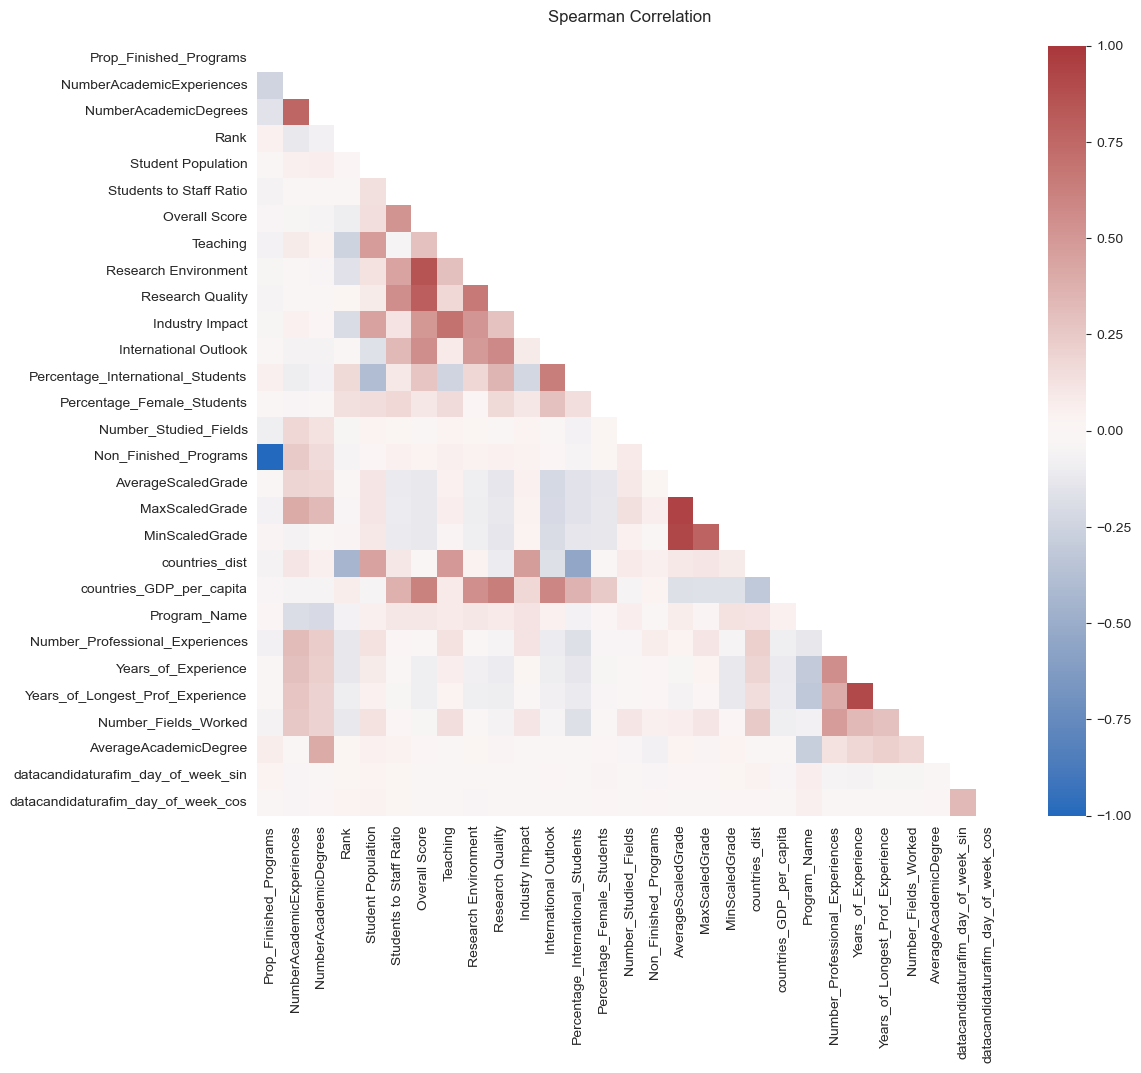

High Correlation: Prop_Finished_Programs and Non_Finished_Programs - Correlation: -0.9997766703154422
High Correlation: NumberAcademicExperiences and NumberAcademicDegrees - Correlation: 0.761573907656017
High Correlation: Overall Score and Research Environment - Correlation: 0.8566233546793769
High Correlation: Overall Score and Research Quality - Correlation: 0.8022161403284551
High Correlation: Teaching and Industry Impact - Correlation: 0.7004964459336186
High Correlation: AverageScaledGrade and MaxScaledGrade - Correlation: 0.9417011422642024
High Correlation: AverageScaledGrade and MinScaledGrade - Correlation: 0.9289415410888999
High Correlation: MaxScaledGrade and MinScaledGrade - Correlation: 0.7767139497532444
High Correlation: Years_of_Experience and Years_of_Longest_Prof_Experience - Correlation: 0.9068113330030534


In [12]:
cor = tf.spearman_correlation(X_grades_train_scaled, numerical_variables, 0.7)

-------
### <font color='#BFD62F'>3.6.2. Spearman Correlation (against the dependent variable) </font> <a class="anchor" id="spearmanrelevant"></a>
[Back to Contents](#toc)

We will assess the Spearman Correlation between our numerical variables and the target, preferring those that have a value over 0.1.

In [13]:
tf.spearman_correlation_with_target(X_grades_train_scaled, y_grades_train, numerical_variables)

,Variable,Spearman Correlation,|Value| >= Threshold
0,Prop_Finished_Programs,0.0060,False
1,NumberAcademicExperiences,0.0344,False
2,NumberAcademicDegrees,0.0132,False
3,Rank,0.0128,False
4,Student Population,0.0100,False
5,Students to Staff Ratio,0.0953,False
6,Overall Score,0.1249,True
7,Teaching,0.0002,False
8,Research Environment,0.1108,True
9,Research Quality,0.1103,True


-------
### <font color='#BFD62F'>3.6.3. ANOVA</font> <a class="anchor" id="anova"></a>
[Back to Contents](#toc)

The Analysis of Variance technique (ANOVA) will compare the mean of a numerical variable for each of the categories of a categorical feature. If there is a statistically significant difference (showed by a p-value below 0.05), then a variable should not be discarded (according to this method).

We should note that these p-values will also decide which variable to keep for each pair of highly-correlated features identified using the Chi-Square Test of Independence.

In [14]:
tf.anova("regression",
         df = X_grades_train_scaled,
         categorical_variables = categorical_variables,
         y = y_grades_train,
         k = "all")

,Feature,P-Value,Significant
0,dprograma,0.000000,True
1,Is_Ranked,0.184129,False
2,Previous_IMS_Student,0.000000,True
3,Previous_Data_Studies,0.000000,True
4,Previous_Computer_Studies,0.674746,False
5,Previous_Tech_Studies,0.017578,True
6,Previous_Math_Studies,0.074797,False
7,Previous_Engineering_Studies,0.021601,True
8,Previous_Finance_Studies,0.040057,True
9,Previous_Marketing_Studies,0.000184,True


-------
### <font color='#BFD62F'>3.6.4. Point Biserial Correlation</font> <a class="anchor" id="biserial"></a>
[Back to Contents](#toc)

As was explained above, the point biserial correlation is a variation of Pearson's Correlation to assess the relationship between a binary and a numerical variable. The function below returns these correlations in a table format, adding an auxiliary column that will be "True" if the (rounded) absolute value of this correlation is above 0.1 - the value we will define as a threshold to accept or reject features.

In [15]:
tf.point_biserial("regression",
                  df = X_grades_train_scaled,
                  target = y_grades_train,
                  binary_variables = binary_variables,
                  threshold = 0.05)

,Variable,Value,|Value| >= Threshold
0,dprograma,0.122001,True
1,Is_Ranked,-0.027985,False
2,Previous_IMS_Student,0.126607,True
3,Previous_Data_Studies,0.106695,True
4,Previous_Computer_Studies,0.008844,False
5,Previous_Tech_Studies,0.050009,True
6,Previous_Math_Studies,0.037536,False
7,Previous_Engineering_Studies,0.048387,True
8,Previous_Finance_Studies,-0.043250,False
9,Previous_Marketing_Studies,-0.078709,True


-------
### <font color='#BFD62F'>3.6.5. Recursive Feature Elimination - Linear Regression</font> <a class="anchor" id="rfelr"></a>
[Back to Contents](#toc)

In [16]:
#rfe_linreg_model = LinearRegression()

#tf.RFE("regression", X_grades_train_scaled, X_grades_val_scaled, y_grades_train, y_grades_val, rfe_linreg_model)

-------
### <font color='#BFD62F'>3.6.6. Recursive Feature Elimination - Support Vector Machines</font> <a class="anchor" id="rfesvm"></a>
[Back to Contents](#toc)

In [17]:
#rfe_svm_model = LinearSVR(random_state = 92)

#tf.RFE("regression", X_grades_train_scaled, X_grades_val_scaled, y_grades_train, y_grades_val, rfe_svm_model)

-------
### <font color='#BFD62F'>3.6.7. Random Forest</font> <a class="anchor" id="rf"></a>
[Back to Contents](#toc)

Our implementation (using sklearn) will return feature importance as the normalized (therefore, totalling 1) reduction of the squared error (the default loss function) brought by that feature. We will discard the features (according to this method) whose importance falls below the defined threshold.

In [18]:
rf_fs_model = RandomForestRegressor(random_state = 92)

tf.random_forest_feature_selection(X_grades_train_scaled, y_grades_train, 0.02, rf_fs_model)

-------
### <font color='#BFD62F'>3.6.8. Least Absolute Shrinkage and Selection Operator (LASSO)</font> <a class="anchor" id="lasso"></a>
[Back to Contents](#toc)

Similarly to the Random Forest, our decision will be to keep the features whose absolute weight in the cost function formula is above the defined threshold.

In [19]:
tf.lasso(X_grades_train_scaled, y_grades_train, threshold = 0.2)

LASSO picked 51 variables and eliminated the other 14 variables.


-------
### <font color='#BFD62F'>3.6.9. Conclusion</font> <a class="anchor" id="conclusion"></a>
[Back to Contents](#toc)

The decisions for each of the implemented feature selection techniques were compilated in the following Excel sheet, whose results can be displayed as follows.

We opted to keep features that were voted to be kept by the majority of the techniques to which they were applied (4/7 for numerical variables, and 3/5 for categorical variables). We dedided not to drop the variables marked as "Keep*" due to our understanding of the problem and their potential value to the models, despite having been narrowly eliminated. The exception is the `idgenero` variable. Although it is fantastic (in terms of Nova IMS' operations) that the applicants' gender does not impact admissions, we cannot prove that our ML solution is also neutral regarding this field unless we include it in our model. Therefore, it will be maintained for the following steps of our study.

In [20]:
excel_path = "Feature Selection.xlsx"
sheet_name = "Grades"
wb = load_workbook(excel_path, data_only=True)
sheet = wb[sheet_name]

fs_table = pd.DataFrame(sheet.values, columns = [cell.value for cell in sheet[1]])
fs_table.drop(index = 0, inplace = True)
styled_df = fs_table.style.apply(lambda row: [tf.highlight_cell(val, column) for val, column in zip(row, fs_table.columns)], axis=1)
styled_df

,Variable,Spearman (1),Spearman (2),ANOVA,Point Biserial,RFE - LogReg,RFE - LinSVM,Random Forest,LASSO,Decision
1,Prop_Finished_Programs,Keep,Discard,-,-,Discard,Keep,Discard,Keep,Discard
2,NumberAcademicExperiences,Keep,Discard,-,-,Discard,Discard,Discard,Discard,Discard
3,NumberAcademicDegrees,Discard,Discard,-,-,Discard,Discard,Discard,Keep,Discard
4,Rank,Keep,Discard,-,-,Discard,Keep,Discard,Discard,Discard
5,Student Population,Keep,Discard,-,-,Discard,Discard,Discard,Discard,Discard
6,Students to Staff Ratio,Keep,Discard,-,-,Keep,Keep,Discard,Keep,Keep
7,Overall Score,Keep,Keep,-,-,Keep,Discard,Discard,Discard,Discard
8,Teaching,Discard,Discard,-,-,Keep,Discard,Discard,Discard,Discard
9,Research Environment,Discard,Keep,-,-,Keep,Keep,Discard,Discard,Discard
10,Research Quality,Discard,Keep,-,-,Keep,Keep,Discard,Discard,Discard


In [21]:
variables_to_keep = fs_table[(fs_table["Decision"].isin(["Keep", "Keep*"]))]["Variable"].tolist()

X_grades_train_scaled = X_grades_train_scaled[variables_to_keep]
X_grades_val_scaled = X_grades_val_scaled[variables_to_keep]

X_grades_train_scaled.head()

,Students to Staff Ratio,Industry Impact,AverageScaledGrade,countries_GDP_per_capita,Program_Name,Years_of_Longest_Prof_Experience,Previous_IMS_Student,Previous_Data_Studies,Previous_Marketing_Studies,is_Portuguese,Previous_Data_Jobs,Previous_Trainee_Jobs,Previous_Jobs_in_Partners,nivelInglesCompreensao,HighestAcademicDegree,datacandidaturafim_month
14,0.416507,0.961995,0.855,0.210667,0.854255,0.030303,0,0,0,1,0,1,0,0.50,0.6,0.090909
15,0.195777,0.655582,0.750,0.635463,1.000000,0.060606,0,0,0,0,0,0,0,1.00,0.6,0.090909
25,0.170825,0.239905,0.650,0.210667,1.000000,0.030303,0,0,0,1,0,1,0,0.75,0.4,0.090909
27,0.182342,0.328979,0.630,0.025924,1.000000,0.060606,0,0,0,0,0,0,0,0.50,0.8,0.090909
28,0.030710,0.157957,0.830,0.210667,0.854255,0.000000,0,0,0,1,0,0,0,0.75,1.0,0.090909


In [22]:
numerical_variables_grades = [var for var in numerical_variables if var in variables_to_keep]
binary_variables_grades = [var for var in binary_variables if var in variables_to_keep]
categorical_variables_grades = [var for var in categorical_variables if var in variables_to_keep]

## <font color='#BFD62F'>3.7. DBSCAN for Outlier Removal</font> <a class="anchor" id="dbscan"></a>
[Back to Contents](#toc)

Density-Based Spatial Clustering of Applications with Noise (commonly known as DBSCAN) is a popular algorithm to perform density-based clustering, which groups observations according to the density of the regions surronding it in the feature space.

Our implementation (adapted from [Pierian Training](https://pieriantraining.com/dbscan-for-outlier-detection-in-python-and-scikit-learn-machine-learning-in-python/) and [Medium](https://medium.com/@dilip.voleti/dbscan-algorithm-for-fraud-detection-outlier-detection-in-a-data-set-60a10ad06ea8)) will retrieve the outliers as per this algorithm, which are observations (applicants) that are in a sparser region of the feature space.

Since our data has more than 2 dimensions, we will define our ideal number of neighbours by doing 2 * number of dimensions in the data. [(Sander et al., 1998)](https://doi.org/10.1023/A:1009745219419)

In [23]:
neigh = NearestNeighbors(n_neighbors = 2 * len(numerical_variables_grades) - 1)
nbrs = neigh.fit(X_grades_train_scaled[numerical_variables_grades])
distances, indices = nbrs.kneighbors(X_grades_train_scaled[numerical_variables_grades])

print("Number of neighbours:", 2 * len(numerical_variables_grades) - 1)

Number of neighbours: 11


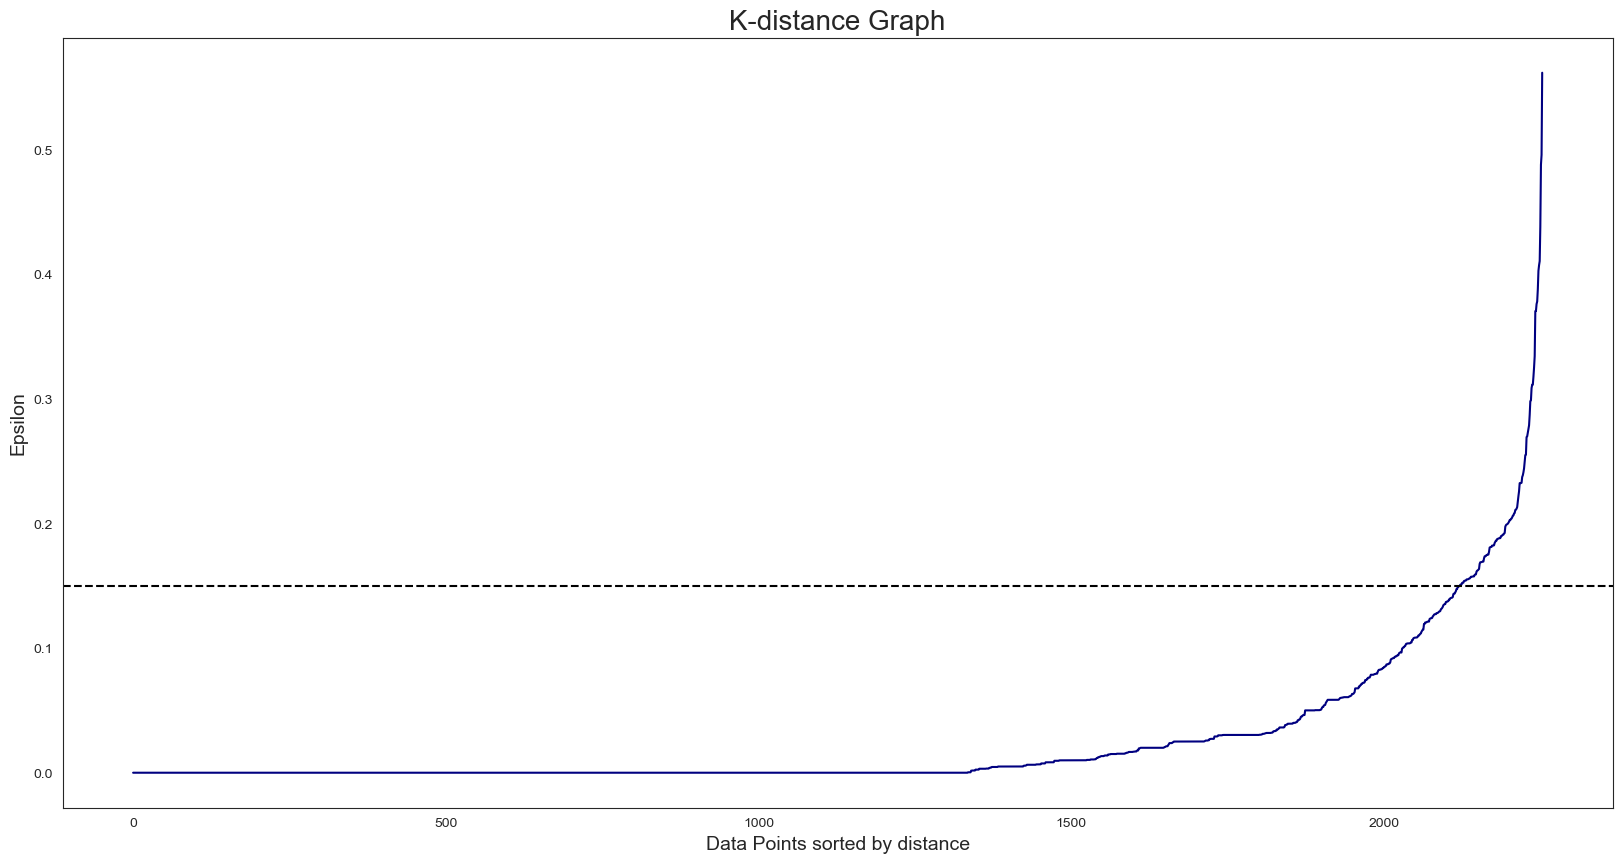

In [24]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances, color = "navy")
plt.axhline(y = 0.15, color = "black", linestyle = "--") 
plt.title("K-distance Graph", fontsize = 20)
plt.xlabel("Data Points sorted by distance", fontsize = 14)
plt.ylabel("Epsilon", fontsize = 14)
plt.show()

Contrary to what could be expected, there is not a clear frontier that separates what is an outlier and what isn't (we would expect for a much bigger slope after a certain number of data points). Therefore, it seems that our DBSCAN solution, even with a considerably high value for the epsilon parameter (which defines the radius of the neighbourhood), will identify too many observations as outliers - which raises the question to if they really are outliers in that case.

In [25]:
dbscan_out = DBSCAN(eps = 0.15, min_samples = 2 * len(numerical_variables_grades) - 1).fit(
    X_grades_train_scaled[numerical_variables_grades])

outliers_dbscan = X_grades_train_scaled[dbscan_out.labels_ == -1]
outliers_dbscan

,Students to Staff Ratio,Industry Impact,AverageScaledGrade,countries_GDP_per_capita,Program_Name,Years_of_Longest_Prof_Experience,Previous_IMS_Student,Previous_Data_Studies,Previous_Marketing_Studies,is_Portuguese,Previous_Data_Jobs,Previous_Trainee_Jobs,Previous_Jobs_in_Partners,nivelInglesCompreensao,HighestAcademicDegree,datacandidaturafim_month
14,0.416507,0.961995,0.855,0.210667,0.854255,0.030303,0,0,0,1,0,1,0,0.50,0.6,0.090909
15,0.195777,0.655582,0.750,0.635463,1.000000,0.060606,0,0,0,0,0,0,0,1.00,0.6,0.090909
28,0.030710,0.157957,0.830,0.210667,0.854255,0.000000,0,0,0,1,0,0,0,0.75,1.0,0.090909
51,0.809981,0.933492,0.420,0.409830,1.000000,0.030303,0,0,0,0,0,1,0,0.75,0.6,0.090909
66,0.267754,0.060570,0.600,0.018183,0.035816,0.545455,0,0,0,0,0,0,0,0.50,0.6,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,0.391555,0.078385,0.850,0.044924,1.000000,0.030303,0,1,0,0,1,0,0,0.50,0.6,0.363636
6386,0.391555,0.078385,0.850,0.044924,1.000000,0.030303,0,1,0,0,1,0,0,0.50,0.6,0.363636
6419,0.209213,0.574822,0.800,0.166522,0.854255,0.030303,0,0,0,0,0,1,0,0.75,0.6,0.363636
6437,0.170825,0.239905,0.800,0.210667,0.665248,0.393939,0,0,1,1,0,0,0,0.50,0.6,0.363636


Since DBSCAN identified more than 14% of our dataset as being outliers (even with a higher threshold), __we will choose not to remove any observation from the dataset__. It is not clear that there are applicants whose characteristics fall far from the common behaviour, and therefore we will allow our prediction models to learn using all these observations.

## <font color='#BFD62F'>3.8. Storing the Dataframes</font> <a class="anchor" id="storing"></a>
[Back to Contents](#toc)

Marking the end of our preprocessing notebooks, we will store the dataframes to be used for modelling in the next notebook. See you there! 👋

In [26]:
%store X_grades_train_scaled
%store X_grades_val_scaled
%store y_grades_train_scaled
%store y_grades_val_scaled

#%store X_grades_train
#%store X_grades_val
#%store y_grades_train
#%store y_grades_val

%store numerical_variables_grades
%store binary_variables_grades
%store categorical_variables_grades

Stored 'X_grades_train_scaled' (DataFrame)
Stored 'X_grades_val_scaled' (DataFrame)
Stored 'y_grades_train_scaled' (Series)
Stored 'y_grades_val_scaled' (Series)
Stored 'numerical_variables_grades' (list)
Stored 'binary_variables_grades' (list)
Stored 'categorical_variables_grades' (list)
